In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df=pd.read_csv('data.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# drop id and Unnamed columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
print(df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = df.drop(['diagnosis'], axis=1)  # Dropping 'id' and target column
y = df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
label_encoder = LabelEncoder()

# Apply LabelEncoder to the target variable if it is categorical
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Before SMOTE: Counter({0: 286, 1: 169})


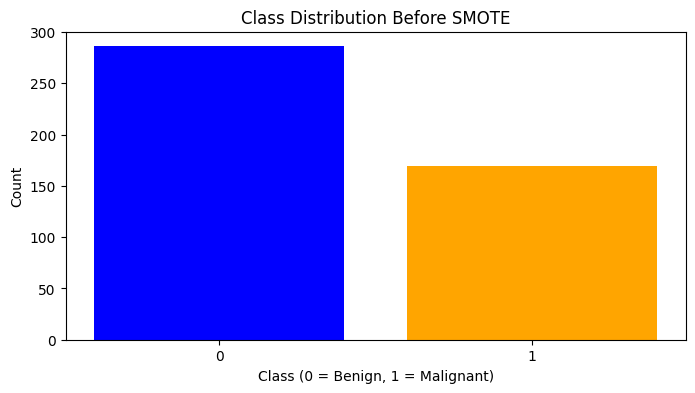

In [ ]:
print("Before SMOTE:", Counter(y_train))
# Visualize class distribution before SMOTE
plt.figure(figsize=(8, 4))
plt.bar(Counter(y_train).keys(), Counter(y_train).values(), color=['blue', 'orange'])
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Class (0 = Benign, 1 = Malignant)")
plt.ylabel("Count")
plt.xticks([0, 1])
plt.show()

In [ ]:
# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

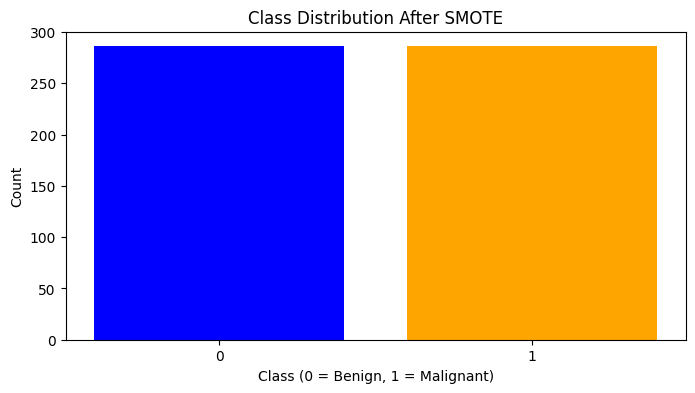

In [ ]:
# Visualize class distribution after SMOTE
plt.figure(figsize=(8, 4))
plt.bar(Counter(y_train_resampled).keys(), Counter(y_train_resampled).values(), color=['blue', 'orange'])
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class (0 = Benign, 1 = Malignant)")
plt.ylabel("Count")
plt.xticks([0, 1])
plt.show()

In [ ]:
rf = RandomForestClassifier(
    random_state=42,
    n_estimators=500,   # tree_num = 500
    max_features=3      # mtry = 3 (randomly selected predictors at each split)
)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_features=3, n_estimators=500, random_state=42)

In [ ]:
# Predictions
y_pred = rf.predict(X_test_scaled)

# Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[70  1]
 [ 1 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Accuracy Score:
0.9824561403508771


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
# Parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 10, 20, None],  # Depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5],     # Minimum samples in a leaf node
}

In [ ]:
# Grid Search with cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model with resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.01, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [ ]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best Decision Tree Model
best_dt = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_dt.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        71
           1       0.93      1.00      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize k-NN classifier with k=20
knn = KNeighborsClassifier(n_neighbors=20)

# Fit the model with training data
knn.fit(X_train_resampled, y_train_resampled)

# Predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize SVM classifier with RBF kernel
svm = SVC(kernel='rbf', gamma=0.1, C=1)

# Fit the model with training data
svm.fit(X_train_resampled, y_train_resampled)

# Predictions on the test set
y_pred = svm.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Initialize XGBoost classifier with specified parameters
xgb_model = xgb.XGBClassifier(learning_rate=0.01, max_depth=5, gamma=3)

# Fit the model with training data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predictions on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01],
    'max_depth': [5],
    'gamma': [3]
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)

# Fit the model with training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

# Predictions on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'gamma': 3, 'learning_rate': 0.01, 'max_depth': 5}
Best CV Score: 0.9598321891685735
Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report

# Define the Neural Network class
class NeuralNet(nn.Module):
    def __init__(self, input_size, output_size, hidden_layer_num):
        super(NeuralNet, self).__init__()
        # Create a network with 8 hidden layers
        layers = []
        layers.append(nn.Linear(input_size, 128))  # First hidden layer
        layers.append(nn.ReLU())
        for _ in range(hidden_layer_num - 1):  # Add remaining hidden layers
            layers.append(nn.Linear(128, 128))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(128, output_size))  # Output layer
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# Parameters
input_size = X_train_resampled.shape[1]  # Number of features
output_size = len(set(y_train_resampled))  # Number of classes
hidden_layer_num = 8
max_step = int(1e+5)
learning_rate = 0.1
threshold = 0.01

# Convert data to PyTorch tensors
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)  # No .values needed
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)


# Initialize the model, loss function, and optimizer
model = NeuralNet(input_size, output_size, hidden_layer_num)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for step in range(max_step):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()

    # Stop training if the gradient is below the threshold
    # if all(p.grad.abs().max() < threshold for p in model.parameters()):
    #     print(f"Training stopped at step {step} as gradients are below threshold.")
    #     break

    optimizer.step()

    # Print loss every 10,000 steps
    if (step + 1) % 50000 == 0:
        print(f"Step [{step + 1}/{max_step}], Loss: {loss.item():.4f}")

# Testing the model
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred = torch.argmax(y_pred, axis=1).numpy()

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Step [50000/100000], Loss: 0.0000
Step [100000/100000], Loss: 0.0000
Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



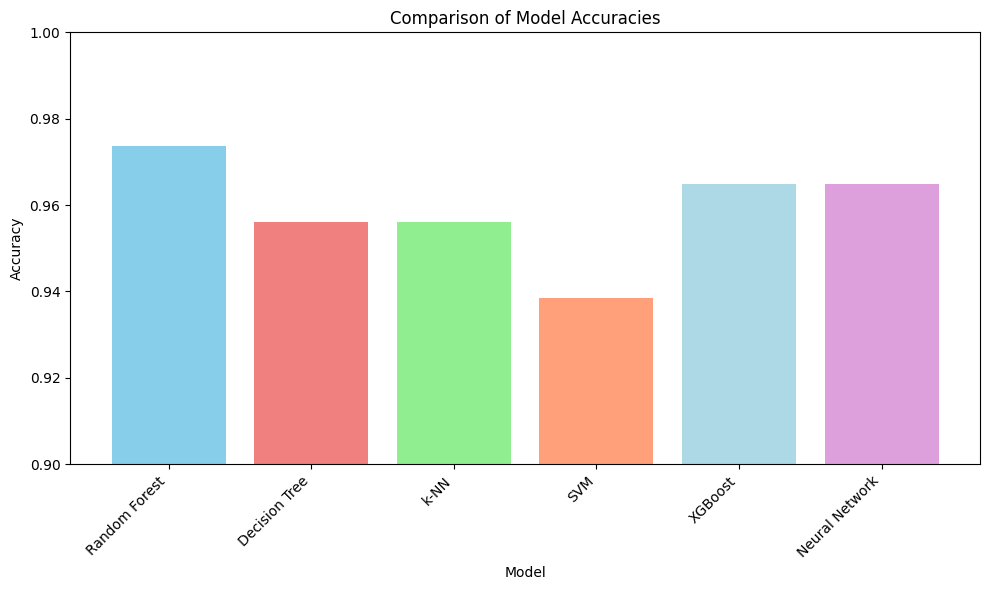

In [ ]:
# prompt: comparision chat of all above model accuracieas with bar chat

import matplotlib.pyplot as plt

# Accuracy scores for each model (replace with your actual scores)
model_names = ['Random Forest', 'Decision Tree', 'k-NN', 'SVM', 'XGBoost', 'Neural Network']
accuracy_scores = [0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9649122807017544, 0.9649122807017544]  # Example accuracy scores


plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue', 'plum'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0.9, 1.0) # adjust y-axis limits as needed
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# prompt: compare the accury of all above classifer in table

import pandas as pd

# Accuracy scores for each model (replace with your actual scores)
model_names = ['Random Forest', 'Decision Tree', 'k-NN', 'SVM', 'XGBoost', 'Neural Network']
accuracy_scores = [0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9385964912280702, 0.9649122807017544, 0.9649122807017544]  # Example accuracy scores

# Create a DataFrame
results_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})

# Display the DataFrame as a table
results_df

,Model,Accuracy
0,Random Forest,0.973684
1,Decision Tree,0.956140
2,k-NN,0.956140
3,SVM,0.938596
4,XGBoost,0.964912
5,Neural Network,0.964912


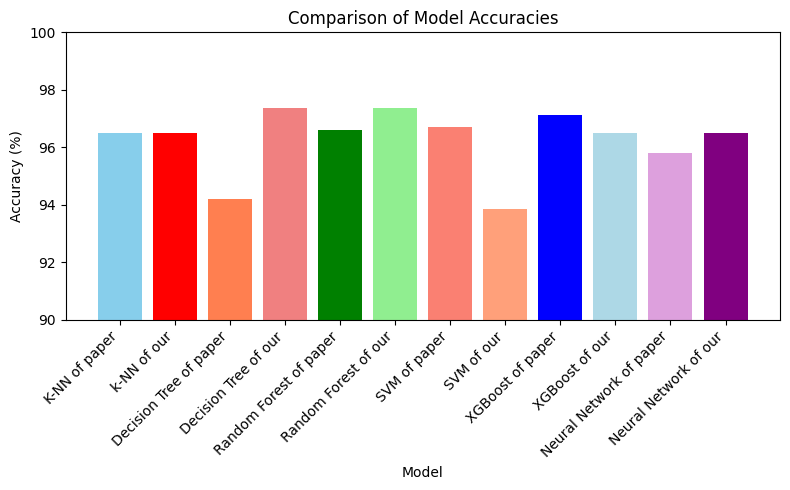

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
model_names = ['K-NN of paper', 'k-NN of our', 'Decision Tree of paper', 'Decision Tree of our', 'Random Forest of paper','Random Forest of our', 'SVM of paper','SVM of our', 'XGBoost of paper','XGBoost of our', 'Neural Network of paper', 'Neural Network of our']
accuracy_scores = [96.5, 96.49, 94.2,97.36, 96.6,97.36, 96.7,93.86, 97.14,96.49, 95.8,96.49 ] # Replace with your model's accuracy

# Ensure model_names and accuracy_scores have the same length
# assert len(model_names) == len(accuracy_scores), "model_names and accuracy_scores must have the same length"


plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracy_scores, color=['skyblue','red','coral', 'lightcoral','green', 'lightgreen','salmon', 'lightsalmon','blue', 'lightblue', 'plum','purple','orange', 'pink'])
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Model Accuracies")
plt.ylim(90, 100) # adjust y-axis limits as needed
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()